In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_vertices_set = [
    100, 133, 178, 237, 316, 422, 562, 745, 
    1000, 1330, 1780, 2370, 3160, 4220, 5620, 7450,
    10000, 13300, 17800, 23700, 31600, 42200, 56200, 74500,
    100000, 133000, 178000, 237000, 316000, 422000, 562000, 745000,
    1000000, 
]
alpha_set = ["0.75"]
alpha_str_set = ["075"]
versions = ["v1", "v2", "v3", "v4"]
versions_label = ["maxClique", "maxCliqueRed", "maxCliqueSkip", "maxCliaueOpt"]

in_dir = "../results/runtime_geo_result/"

time_result = []
tags = []
for ver in versions:
    for [alpha, alpha_str] in zip(alpha_set, alpha_str_set):
        time_result.append([])
        tags.append(alpha + "_" + ver)
        for num_vertices in num_vertices_set:
            # file open
            f = open(in_dir + "{}_{}_{}.txt".format(num_vertices, alpha_str, ver), "r")
            tot = 0
            for i in range(100):
                num_clique, = map(int, f.readline().split())
                cliques = list(map(int, f.readline().split()))
                v, = map(float, f.readline().split())
                tot += v
            time_result[-1].append(tot / 100)
            f.close()

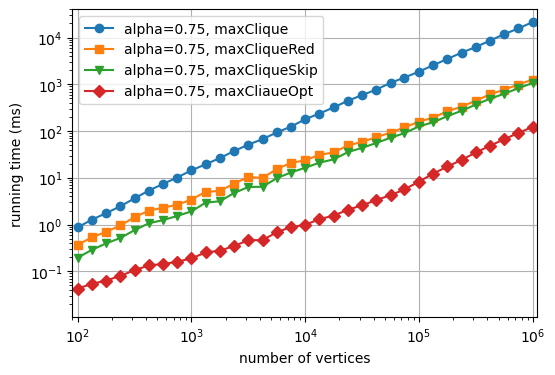

In [3]:
# plot the result (log-log scale)
plt.figure(figsize=(6, 4))

markers = ["o", "s", "v", "D"]

for i in range(len(versions)):
    for j in range(len(alpha_set)):
        plt.plot(num_vertices_set, time_result[i], label="alpha={}, {}".format(alpha_set[j], versions_label[i]), marker=markers[i], linestyle="-")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("number of vertices")
plt.ylabel("running time (ms)")
plt.legend()
plt.ylim(1.05e-2, 4.05e4)
plt.xlim(90, 1100000)
# plt.grid(True, which="both", ls="-");
plt.grid();
plt.show()


In [4]:
alpha_set = ["0.75"]
alpha_str_set = ["075"]
in_dirs = ["../results/runtime_geo_result/", "../results/runtime_nongeo_result/"]
versions = ["v4", "v1"]
versions_label = ["with geometry", "without geometry"]

time_result = []
tags = []
for [in_dir, ver] in zip(in_dirs, versions):
    for [alpha, alpha_str] in zip(alpha_set, alpha_str_set):
        time_result.append([])
        tags.append(alpha + "_" + ver)
        for num_vertices in num_vertices_set:
            # file open
            f = open(in_dir + "{}_{}_{}.txt".format(num_vertices, alpha_str, ver), "r")
            tot = 0
            for i in range(100):
                num_clique, = map(int, f.readline().split())
                cliques = list(map(int, f.readline().split()))
                v, = map(float, f.readline().split())
                tot += v
            time_result[-1].append(tot / 100)
            f.close()


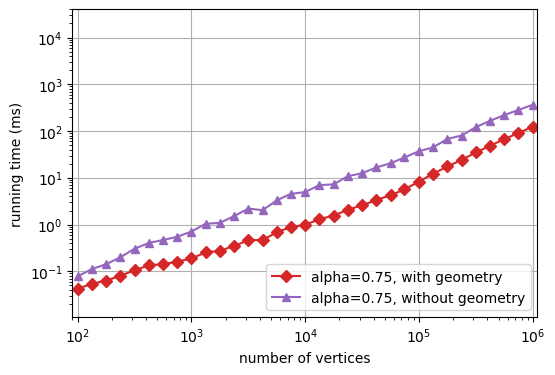

In [5]:
# plot the result (log-log scale)
plt.figure(figsize=(6, 4))

markers = ["D", "^"]
colors = ["tab:red", "tab:purple"]

for i in range(len(versions)):
    for j in range(len(alpha_set)):
        plt.plot(num_vertices_set, time_result[(i)*len(alpha_set)+j], label="alpha={}, {}".format(alpha_set[j], versions_label[i]), marker=markers[(i)*len(alpha_set)+j], linestyle="-", color=colors[(i)*len(alpha_set)+j])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("number of vertices")
plt.ylabel("running time (s)")
plt.legend(loc= "lower right")
plt.xlabel("number of vertices")
plt.ylabel("running time (ms)")
plt.ylim(1.05e-2, 4.05e4)
plt.xlim(90, 1100000)
# plt.grid(True, which="both", ls="-");
plt.grid()
plt.show()
